In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib.mlab import frange
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score


Using TensorFlow backend.


## Chargement du jeu de données Shuttle

Shuttle contient 10 attributs dont le dernier est la classe à expliquer.
Il y a 46464 observations dont 878 anormales.
Avec le dernier attribut, nous avons les classes "o" pour les anomalies et "n" pour les observations normales.

In [4]:
data_brut_Shuttle = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X_Shuttle = data_brut_Shuttle[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut_Shuttle = data_brut_Shuttle[[9]]
data_brut_Shuttle.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


## Chargement du jeu de données KDD99-Cup HTTP

KDD99-Cup HTTP contient 30 attributs dont le dernier est la classe à expliquer.
Il y a 620098 observations dont 1052 anormales.
Avec le dernier attribut, nous avons les classes "o" pour les anomalies et "n" pour les observations normales.

In [5]:
data_brut_KDD99CUP = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/kdd99-unsupervised-ad_2019-06-24 16:08:29.815617.csv', header=None, index_col=None)
X_KDD99CUP = data_brut_KDD99CUP[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]]
y_brut_KDD99CUP = data_brut_KDD99CUP[[29]]
data_brut_KDD99CUP.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,620098.000000,620098.000000,6.200980e+05,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,...,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000,620098.000000
mean,0.627670,280.374673,4.099298e+03,0.005012,0.912428,0.000947,0.000318,0.000013,0.000010,0.005409,...,127.698101,244.485422,0.996744,0.000796,0.074723,0.031820,0.001920,0.001473,0.087651,0.086732
std,53.972528,1509.901935,2.369388e+04,0.098271,0.282671,0.045654,0.017821,0.003592,0.003111,0.073346,...,105.897233,40.458619,0.033137,0.009522,0.185812,0.050689,0.030694,0.028037,0.274777,0.268543
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,210.000000,4.580000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,240.000000,1.425000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.000000,255.000000,1.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,302.000000,3.731000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000
max,41065.000000,54540.000000,1.173059e+07,21.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Transformation de la classe à expliquer

L'objectif ici est de remplacer les "o" par -1 et les "n" par 1 afin de faire les matrices de confusion avec la fonction dédiée de scikit-learn.

In [6]:
y_transform_Shuttle = y_brut_Shuttle
y_transform_Shuttle = np.where(y_transform_Shuttle=='o',-1,1)
#y_transform
y_transform_KDD99CUP = y_brut_KDD99CUP
y_transform_KDD99CUP = np.where(y_transform_KDD99CUP=='o',-1,1)
#y_transform_KDD99CUP

## Shuttle

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier n_estimators

### Etude de l'inconstance de IForest
Utilisant les valeurs par défaut des paramètres de IForest au niveau de scikit-learn

In [7]:
study_executions_time_IF_Shuttle = []
study_roc_auc_IF_Shuttle = []
study_recalls_IF_Shuttle = []
study_specificity_IF_Shuttle = []

for j in range(10, 100, 10):
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    study_func_IF_Shuttle = IsolationForest(behaviour="new")
    study_func_IF_Shuttle.fit(X_Shuttle)
    study_y_pred_IF_Shuttle = study_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    study_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    study_executions_time_IF_Shuttle.append(study_exec_time_IF_Shuttle)
    
    # Recall
    study_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, study_y_pred_IF_Shuttle))
    
    # Specificity
    study_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, study_y_pred_IF_Shuttle))
    
    # Calcul de l'aire sous la courbe ROC
    study_y_DF_IF_Shuttle = study_func_IF_Shuttle.decision_function(X_Shuttle)
    study_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, study_y_DF_IF_Shuttle)
    study_roc_auc_IF_Shuttle.append(study_auc_IF_Shuttle)

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/thesard/anaconda3/lib/python3.7/site-

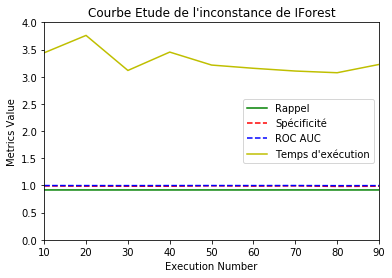

In [14]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_executions_time_IF_Shuttle, "y-", label="Temps d'exécution")
plt.title("Courbe Etude de l'inconstance de IForest")
plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

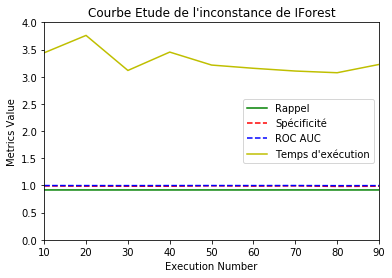

In [14]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_roc_auc_IF_Shuttle, "b--", label="ROC AUC")
plt.title("Courbe Etude de l'inconstance de IForest")
plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

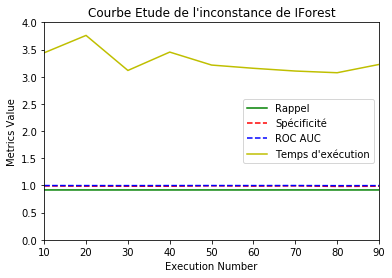

In [14]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_recalls_IF_Shuttle, "g-", label="Rappel")
plt.title("Courbe Etude de l'inconstance de IForest")
plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

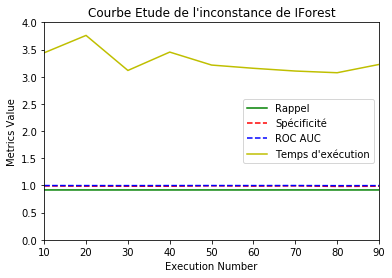

In [14]:
# Evolution de spécificité et rappel
plt.plot(range(10, 100, 10), study_specificity_IF_Shuttle, "r--", label="Spécificité")
plt.title("Courbe Etude de l'inconstance de IForest")
plt.axis([10, 90, 0, 4])
plt.xlabel('Execution Number')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

#### Conclusion
Malgré le caractère aléatoire de IForest, les métrics choisis ont tendance à être constant durant l'exécution successive avec les mêmes paramètres.

In [15]:
executions_time_IF_Shuttle = []
roc_auc_IF_Shuttle = []
precisions_IF_Shuttle = []
recalls_IF_Shuttle = []
f1_scores_IF_Shuttle = []
tn_IF_Shuttle = []
fp_IF_Shuttle = []
fn_IF_Shuttle = []
tp_IF_Shuttle = []
specificity_IF_Shuttle = []
n_estimators_IF_Shuttle = []

for j in range(10, 1000, 10):
    print("n_estimators = "+str(j))
    n_estimators = j
    n_estimators_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    func_IF_Shuttle = IsolationForest(n_estimators=n_estimators, behaviour="new")
    func_IF_Shuttle.fit(X_Shuttle)
    y_pred_IF_Shuttle = func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    exec_time_IF_Shuttle = time() - start_IF_Shuttle
    executions_time_IF_Shuttle.append(exec_time_IF_Shuttle)
    
    # Precision
    precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Recall
    recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # f1_score
    f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Specificity
    specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    tn_IF_Shuttle.append(tn)
    fp_IF_Shuttle.append(fp)
    fn_IF_Shuttle.append(fn)
    tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    y_DF_IF_Shuttle = func_IF_Shuttle.decision_function(X_Shuttle)
    auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, y_DF_IF_Shuttle)
    roc_auc_IF_Shuttle.append(auc_IF_Shuttle)
        
    #print("Execution time of IsolationForest applied on Shuttle (in second)")
    #print(executions_time_IF_Shuttle)
    #print("ROC AUC for Isolation Forest applied on Shuttle")
    #print(roc_auc_IF_Shuttle)

n_estimators = 10


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637]
n_estimators = 20


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367]
n_estimators = 30


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679]
n_estimators = 40


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016]
n_estimators = 50


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438]
n_estimators = 60


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609]
n_estimators = 70


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029]
n_estimators = 80


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229]
n_estimators = 90


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269]
n_estimators = 100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497]
n_estimators = 110


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216]
n_estimators = 120


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947]
n_estimators = 130


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254]
n_estimators = 140


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412]
n_estimators = 150


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719]
n_estimators = 160


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809]
n_estimators = 170


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899]
n_estimators = 180


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904]
n_estimators = 190


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794]
n_estimators = 200


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169]
n_estimators = 210


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169, 0.9968053073881633]
n_estimators = 220


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169, 0.9968053073881633, 0.9968955271105392]
n_estimators = 230


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169, 0.9968053073881633, 0.9968955271105392, 0.99

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169, 0.9968053073881633, 0.996

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.9974970835369169, 0.9968

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.9976194960347794, 0.99749

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229838577904, 0.997619

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.9969935170720899, 0.9978229

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.9971667609255809, 0.99699351

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477528719, 0.997166760

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.997255119288412, 0.9956581477

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049530254, 0.9972551192

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645097947, 0.9984822049

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.99685485203216, 0.9965284645

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.9975229801700497, 0.996854852

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427013269, 0.997522980

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.996857562871229, 0.998813427

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.996889405861029, 0.99685756

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670367865609, 0.9968894

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.9957189979699438, 0.9982670

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.9962956946279016, 0.995718997

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.9915522009664679, 0.996295694

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.9986632315380367, 0.991552200

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339]
ROC AUC for Isolation Forest applied on Shuttle
[0.995952230068637, 0.998663231

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108]
ROC AUC for Isolation Forest applied on Shuttle
[0.99595223

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436]
ROC AUC for Isolation Forest applied on 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443]
ROC AUC for Isolatio

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407]


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Execution time of IsolationForest applied on Shuttle (in second)
[0.32144689559936523, 0.6461000442504883, 1.0567457675933838, 1.2533798217773438, 1.650329828262329, 1.7771179676055908, 2.1839699745178223, 2.6413350105285645, 2.7329516410827637, 3.0031988620758057, 3.186779022216797, 3.7023820877075195, 3.876016139984131, 4.1864612102508545, 4.44146990776062, 6.195428133010864, 5.409062147140503, 5.651955842971802, 6.242660045623779, 7.220815896987915, 6.727471113204956, 7.322738885879517, 7.790522813796997, 7.857840061187744, 8.300517082214355, 8.166547060012817, 8.326849937438965, 8.584643125534058, 8.953378915786743, 9.236344814300537, 9.324568033218384, 9.652966976165771, 10.455974102020264, 10.322875261306763, 10.52415680885315, 10.955713987350464, 11.18612813949585, 12.054737091064453, 11.904200315475464, 12.338850259780884, 12.5204758644104, 12.797037124633789, 13.128127098083496, 13.581660032272339, 13.837814092636108, 14.62335991859436, 14.878289699554443, 15.102436304092407, 

### Résultat de Isolation Forest sur Shuttle

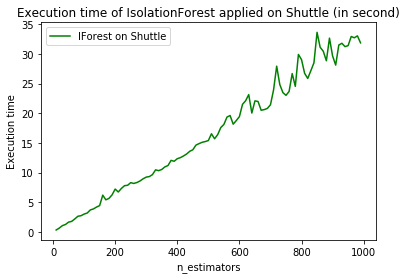

In [18]:
plt.plot(range(10, 1000, 10), executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('n_estimators')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

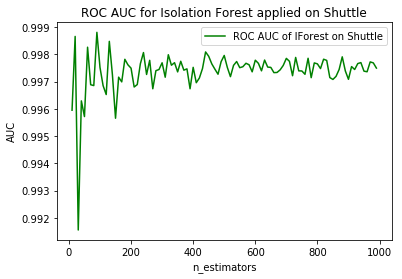

In [19]:
plt.plot(range(10, 1000, 10), roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [28]:
index = roc_auc_IF_Shuttle.index(max(roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(executions_time_IF_Shuttle[index])+"s obtenue avec un n_estimators de "+str(n_estimators_IF_Shuttle[index])+" donnant un rappel de "+str(recalls_IF_Shuttle[index])+" et une spécificité de "+str(specificity_IF_Shuttle[index]))


La meilleure est 0.998813427013269 pour un temps d'exécution de 2.7329516410827637s obtenue avec un n_estimators de 90 donnant un rappel de 0.917255297679112 et une spécificité de 0.9965831435079726


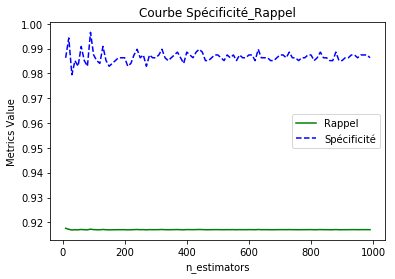

In [22]:
# Evolution de spécificité et rappel
plt.plot(n_estimators_IF_Shuttle, recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(n_estimators_IF_Shuttle, specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('n_estimators')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


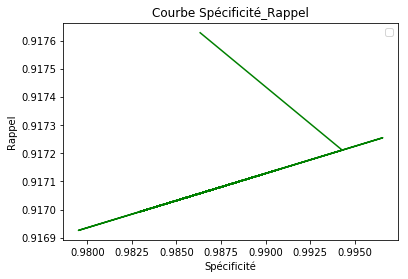

In [24]:
# Evolution de spécificité et rappel
plt.plot(specificity_IF_Shuttle, recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

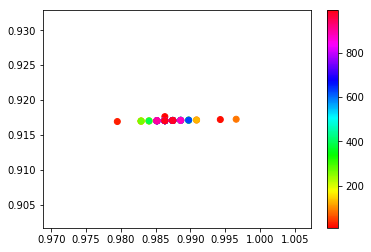

In [27]:
import matplotlib.cm as cm
plt.scatter(specificity_IF_Shuttle,recalls_IF_Shuttle, c=n_estimators_IF_Shuttle, cmap=cm.hsv)
cbar= plt.colorbar()
plt.show()

### Résultat
###### Faisant varier n_estimators et max_samples = 256, contamination = 0,1
L'augmentation du nombre d'arbres augmente le temps d'exécution. L'écart est léger 
la AUC est aléatoire avec quelques pics. 
Quelque soit le nombre d'estimateur, la AUC > 0,94

Meilleure estimation :
    - Temps   = 2.9633030891418457
    - ROC AUC = 0.954597443146584 à n_estimators : 80 ==> 15 * 5 + 5

Le nombre d'estimateur a une influence sur la performance de IForest pouvant l'améliorer comme la détérioré. Cela s'explique par le caractère aléatoire de la construction de l'arbre.

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier max_samples

In [31]:
MS_executions_time_IF_Shuttle = []
MS_roc_auc_IF_Shuttle = []
MS_precisions_IF_Shuttle = []
MS_recalls_IF_Shuttle = []
MS_f1_scores_IF_Shuttle = []
MS_tn_IF_Shuttle = []
MS_fp_IF_Shuttle = []
MS_fn_IF_Shuttle = []
MS_tp_IF_Shuttle = []
MS_specificity_IF_Shuttle = []
MS_max_samples_IF_Shuttle = []

for j in range(100, len(X_Shuttle), 1000):
    print("max_samples = "+str(j))
    max_samples = j
    MS_max_samples_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    MS_func_IF_Shuttle = IsolationForest(max_samples=max_samples, behaviour="new")
    MS_func_IF_Shuttle.fit(X_Shuttle)
    MS_y_pred_IF_Shuttle = MS_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    MS_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    MS_executions_time_IF_Shuttle.append(MS_exec_time_IF_Shuttle)
    
    # Precision
    MS_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Recall
    MS_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # f1_score
    MS_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Specificity
    MS_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, MS_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    MS_tn_IF_Shuttle.append(tn)
    MS_fp_IF_Shuttle.append(fp)
    MS_fn_IF_Shuttle.append(fn)
    MS_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    MS_y_DF_IF_Shuttle = MS_func_IF_Shuttle.decision_function(X_Shuttle)
    MS_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, MS_y_DF_IF_Shuttle)
    MS_roc_auc_IF_Shuttle.append(MS_auc_IF_Shuttle)
    

max_samples = 100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 1100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 2100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 3100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 4100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 5100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 6100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 7100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 8100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 9100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 10100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 11100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 12100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 13100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 14100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 15100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 16100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 17100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 18100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 19100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 20100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 21100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 22100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 23100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 24100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 25100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 26100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 27100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 28100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 29100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 30100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 31100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 32100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 33100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 34100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 35100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 36100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 37100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 38100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 39100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 40100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 41100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 42100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 43100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 44100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 45100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


max_samples = 46100


/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


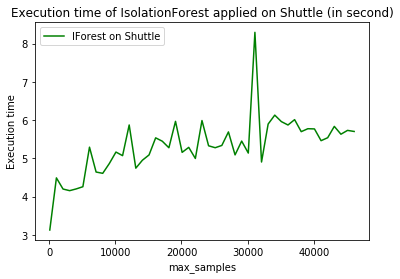

In [32]:
plt.plot(MS_max_samples_IF_Shuttle, MS_executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('max_samples')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

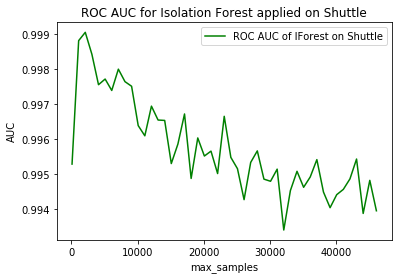

In [33]:
plt.plot(MS_max_samples_IF_Shuttle, MS_roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('max_samples')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [34]:
MS_index = MS_roc_auc_IF_Shuttle.index(max(MS_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(MS_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(MS_executions_time_IF_Shuttle[MS_index])+"s obtenue avec un max_samples de "+str(MS_max_samples_IF_Shuttle[MS_index])+" donnant un rappel de "+str(MS_recalls_IF_Shuttle[MS_index])+" et une spécificité de "+str(MS_specificity_IF_Shuttle[MS_index]))


La meilleure est 0.9990598510292744 pour un temps d'exécution de 4.200182914733887s obtenue avec un max_samples de 2100 donnant un rappel de 0.917321107357522 et une spécificité de 1.0


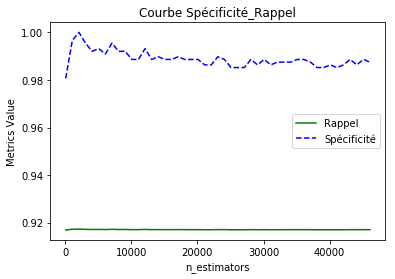

In [35]:
# Evolution de spécificité et rappel
plt.plot(MS_max_samples_IF_Shuttle, MS_recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(MS_max_samples_IF_Shuttle, MS_specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('max_samples')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


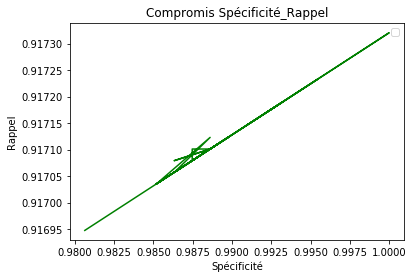

In [36]:
# Evolution de spécificité et rappel
plt.plot(MS_specificity_IF_Shuttle, MS_recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

### Résultat
###### Faisant varier max_samples, n_estimators = 100, contamination = 0,1
Plus le nombre d'éléments dans l'échantillon augmente, plus le temps d'exécution est long.
Par contre, quelque soit max_samples, la AUC ne varie pas beaucoup : entre 0,950 et 0,958.

Meilleure estimation :
    - Temps   = 3.8525819778442383
    - ROC AUC = 0.958660553678761 à max_samples : 1610 ==> 16 * 100 +10

Max_samples n'a donc pas une grande incidence sur les performances de classification de IForest pour un jeu de données de taille et de dimension faibles. Mais il a une conséquences sur le temps d'exécution.

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier contamination (contamination : float in (0., 0.5), optional (default=0.1))

In [38]:
CONT_executions_time_IF_Shuttle = []
CONT_roc_auc_IF_Shuttle = []
CONT_precisions_IF_Shuttle = []
CONT_recalls_IF_Shuttle = []
CONT_f1_scores_IF_Shuttle = []
CONT_tn_IF_Shuttle = []
CONT_fp_IF_Shuttle = []
CONT_fn_IF_Shuttle = []
CONT_tp_IF_Shuttle = []
CONT_specificity_IF_Shuttle = []
CONT_contamination_IF_Shuttle = []

for j in np.arange(0., 0.5, 0.01):
    print("contamination = "+str(j))
    contamination = j
    CONT_contamination_IF_Shuttle.append(j)
    start_IF_Shuttle = time()
        
    # Instanciation, fit and predict on Shuttle
    CONT_func_IF_Shuttle = IsolationForest(contamination=contamination, behaviour="new")
    CONT_func_IF_Shuttle.fit(X_Shuttle)
    CONT_y_pred_IF_Shuttle = CONT_func_IF_Shuttle.predict(X_Shuttle)

    # Calcul du temps d'exécution
    CONT_exec_time_IF_Shuttle = time() - start_IF_Shuttle
    CONT_executions_time_IF_Shuttle.append(CONT_exec_time_IF_Shuttle)
    
    # Precision
    CONT_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Recall
    CONT_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # f1_score
    CONT_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Specificity
    CONT_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, CONT_y_pred_IF_Shuttle))
    
    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, CONT_y_pred_IF_Shuttle).ravel()
    tn = ttp
    fp = tfn
    fn = tfp
    tp = ttn
    CONT_tn_IF_Shuttle.append(tn)
    CONT_fp_IF_Shuttle.append(fp)
    CONT_fn_IF_Shuttle.append(fn)
    CONT_tp_IF_Shuttle.append(tp)
    
    # Calcul de l'aire sous la courbe ROC
    CONT_y_DF_IF_Shuttle = CONT_func_IF_Shuttle.decision_function(X_Shuttle)
    CONT_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, CONT_y_DF_IF_Shuttle)
    CONT_roc_auc_IF_Shuttle.append(CONT_auc_IF_Shuttle)

contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamina

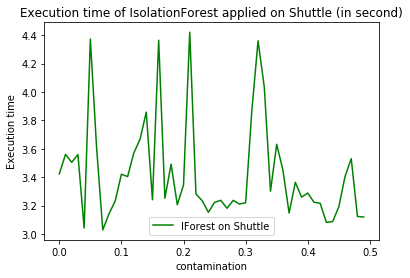

In [39]:
plt.plot(CONT_contamination_IF_Shuttle, CONT_executions_time_IF_Shuttle,  "g-", label="IForest on Shuttle")
plt.xlabel('contamination')
plt.ylabel('Execution time')
plt.title("Execution time of IsolationForest applied on Shuttle (in second)")
plt.legend(loc="best")
plt.show()

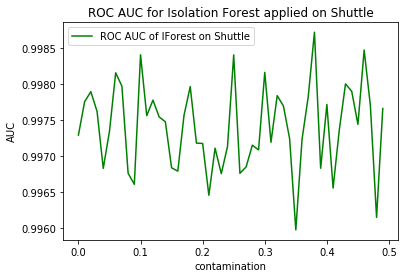

In [40]:
plt.plot(CONT_contamination_IF_Shuttle, CONT_roc_auc_IF_Shuttle,  "g-", label="ROC AUC of IForest on Shuttle")
plt.xlabel('contamination')
plt.ylabel('AUC')
plt.title("ROC AUC for Isolation Forest applied on Shuttle")
plt.legend(loc="best")
plt.show()

In [41]:
CONT_index = CONT_roc_auc_IF_Shuttle.index(max(CONT_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(CONT_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(CONT_executions_time_IF_Shuttle[CONT_index])+"s obtenue avec une contamination de "+str(CONT_contamination_IF_Shuttle[CONT_index])+" donnant un rappel de "+str(CONT_recalls_IF_Shuttle[CONT_index])+" et une spécificité de "+str(CONT_specificity_IF_Shuttle[CONT_index]))


La meilleure est 0.9987178355821389 pour un temps d'exécution de 3.3642470836639404s obtenue avec une contamination de 0.38 donnant un rappel de 0.6319484052121266 et une spécificité de 1.0


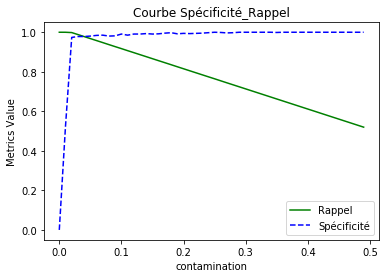

In [42]:
# Evolution de spécificité et rappel
plt.plot(CONT_contamination_IF_Shuttle, CONT_recalls_IF_Shuttle, "g-", label="Rappel")
plt.plot(CONT_contamination_IF_Shuttle, CONT_specificity_IF_Shuttle, "b--", label="Spécificité")
plt.title("Courbe Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('contamination')
plt.ylabel('Metrics Value')
plt.legend(loc="best")
    
plt.show()

No handles with labels found to put in legend.


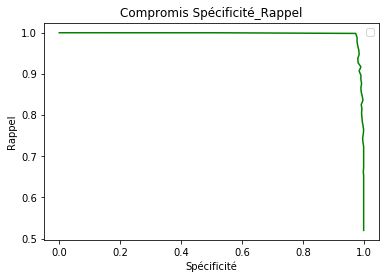

In [43]:
# Evolution de spécificité et rappel
plt.plot(CONT_specificity_IF_Shuttle, CONT_recalls_IF_Shuttle, "g-")
plt.title("Compromis Spécificité_Rappel")
#plt.axis([0, 1, 0, 1])
plt.xlabel('Spécificité')
plt.ylabel('Rappel')
plt.legend(loc="best")
    
plt.show()

### Exécution de Isolation Forest sur le jeux de données Shuttle en faisant varier la combinaison entre n_estimators et max_samples

In [ ]:
GENE_executions_time_IF_Shuttle = []
GENE_roc_auc_IF_Shuttle = []
GENE_precisions_IF_Shuttle = []
GENE_recalls_IF_Shuttle = []
GENE_f1_scores_IF_Shuttle = []
GENE_tn_IF_Shuttle = []
GENE_fp_IF_Shuttle = []
GENE_fn_IF_Shuttle = []
GENE_tp_IF_Shuttle = []
GENE_specificity_IF_Shuttle = []
GENE_contamination_IF_Shuttle = []
GENE_n_estimators_IF_Shuttle = []
GENE_max_samples_IF_Shuttle = []

for j in range(10, 1000, 10):
    print("n_estimators = "+str(j))
    n_estimators = j
    GENE_n_estimators_IF_Shuttle.append(j)
    for k in range(100, len(X_Shuttle), 1000):
        print("max_samples = "+str(k))
        max_samples = k
        GENE_max_samples_IF_Shuttle.append(k)
        for f in np.arange(0., 0.5, 0.01):
            print("contamination = "+str(f))
            contamination = f
            GENE_contamination_IF_Shuttle.append(f)
            start_IF_Shuttle = time()

            # Instanciation, fit and predict on Shuttle
            GENE_func_IF_Shuttle = IsolationForest(max_samples=max_samples, n_estimators=n_estimators, contamination=contamination, behaviour="new")
            GENE_func_IF_Shuttle.fit(X_Shuttle)
            GENE_y_pred_IF_Shuttle = GENE_func_IF_Shuttle.predict(X_Shuttle)

            # Calcul du temps d'exécution
            GENE_exec_time_IF_Shuttle = time() - start_IF_Shuttle
            GENE_executions_time_IF_Shuttle.append(GENE_exec_time_IF_Shuttle)

            # Precision
            GENE_precisions_IF_Shuttle.append(precision_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Recall
            GENE_recalls_IF_Shuttle.append(recall_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # f1_score
            GENE_f1_scores_IF_Shuttle.append(f1_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Specificity
            GENE_specificity_IF_Shuttle.append(specificity_score(y_transform_Shuttle, GENE_y_pred_IF_Shuttle))

            # Matrice de confusion
            ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, GENE_y_pred_IF_Shuttle).ravel()
            tn = ttp
            fp = tfn
            fn = tfp
            tp = ttn
            GENE_tn_IF_Shuttle.append(tn)
            GENE_fp_IF_Shuttle.append(fp)
            GENE_fn_IF_Shuttle.append(fn)
            GENE_tp_IF_Shuttle.append(tp)

            # Calcul de l'aire sous la courbe ROC
            GENE_y_DF_IF_Shuttle = GENE_func_IF_Shuttle.decision_function(X_Shuttle)
            GENE_auc_IF_Shuttle = roc_auc_score(y_transform_Shuttle, GENE_y_DF_IF_Shuttle)
            GENE_roc_auc_IF_Shuttle.append(GENE_auc_IF_Shuttle)

n_estimators = 10
max_samples = 100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination =

contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 8100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0

contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 15100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contaminat

contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 23100
contamination = 0.0
contamination = 

contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 30100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 

contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 37100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.4100000000000

contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 45100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination =

contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 5100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contaminati

contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 

contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 20100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination =

contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 27100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamina

contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 35100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination =

contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 42100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination =

contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000

contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 10100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination =

contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 17100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamina

contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 25100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination =

contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 32100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination =

contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamin

contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
n_estimators = 40
max_samples = 100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15

contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 7100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contaminat

contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 15100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination =

contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 22100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination =

contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamin

contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 37100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination =

contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 44100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamina

contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 5100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0

contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 12100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination =

max_samples = 19100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contaminat

contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 27100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 

contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 34100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contaminat

contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 42100
contamination = 0.0
contamination = 0.01
contamination = 

contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 2100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0

contamination = 0.48
contamination = 0.49
max_samples = 9100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contaminati

contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 17100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 

contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 24100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contaminat

contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 32100
contamination =

contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 39100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 

contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 46100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contaminat

contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 7100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 

contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 14100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contaminat

contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination 

contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamination = 0.39
contamination = 0.4
contamination = 0.41000000000000003
contamination = 0.42
contamination = 0.43
contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 29100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination =

contamination = 0.44
contamination = 0.45
contamination = 0.46
contamination = 0.47000000000000003
contamination = 0.48
contamination = 0.49
max_samples = 36100
contamination = 0.0
contamination = 0.01
contamination = 0.02
contamination = 0.03
contamination = 0.04
contamination = 0.05
contamination = 0.06
contamination = 0.07
contamination = 0.08
contamination = 0.09
contamination = 0.1
contamination = 0.11
contamination = 0.12
contamination = 0.13
contamination = 0.14
contamination = 0.15
contamination = 0.16
contamination = 0.17
contamination = 0.18
contamination = 0.19
contamination = 0.2
contamination = 0.21
contamination = 0.22
contamination = 0.23
contamination = 0.24
contamination = 0.25
contamination = 0.26
contamination = 0.27
contamination = 0.28
contamination = 0.29
contamination = 0.3
contamination = 0.31
contamination = 0.32
contamination = 0.33
contamination = 0.34
contamination = 0.35000000000000003
contamination = 0.36
contamination = 0.37
contamination = 0.38
contamina

In [ ]:
GENE_index = GENE_roc_auc_IF_Shuttle.index(max(GENE_roc_auc_IF_Shuttle))
print("La meilleure est "+str(max(GENE_roc_auc_IF_Shuttle))+" pour un temps d'exécution de "+str(GENE_executions_time_IF_Shuttle[GENE_index])+"s obtenue avec une contamination de "+str(GENE_contamination_IF_Shuttle[GENE_index])+" avec un max_samples de "+str(GENE_max_samples_IF_Shuttle[GENE_index])+" et avec un n_estimators de "+str(GENE_n_estimators_IF_Shuttle[GENE_index])+" donnant un rappel de "+str(GENE_recalls_IF_Shuttle[GENE_index])+" et une spécificité de "+str(GENE_specificity_IF_Shuttle[GENE_index]))


### Interprétation du résultat de IsolationForest sur Shuttle

###### Faisant varier n_estimators

###### Faisant varier max_samples

###### Faisant varier contamination

###### Meilleure combinaison entre n_estimators et max_samples

###### Meilleure combinaison entre n_estimators et contamination

###### Meilleure combinaison entre max_samples et contamination

###### Meilleure combinaison entre max_samples, n_estimators et contamination